# Actividad 6.2 Regresión lineal múltiple 

In [190]:
# Librerías a utilizar 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Datos a utilizar 
mexico = pd.read_csv("mexico_clean.csv")
california = pd.read_csv("California_clean.csv")
girona = pd.read_csv("girona_clean.csv")

# México 

## Modelo 1: 
## **host_acceptance_rate**: host_response_rate, Price, number_of_reviews , review_scores_rating

### Entire home/apt

In [192]:
# Crear subconjuntos por el tipo de habitación  
mexico_rentire =mexico[mexico["room_type"] == "Entire home/apt"]
# Comprobamos el filtrado exitoso 
mexico_rentire["room_type"].value_counts()

Entire home/apt    15601
Name: room_type, dtype: int64

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

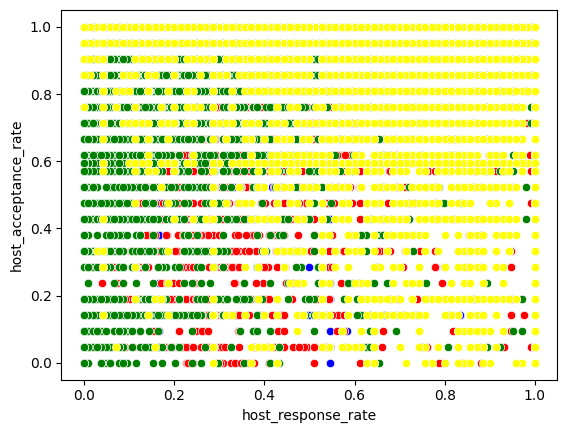

In [193]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = mexico_rentire.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
mexico_scaled = pd.DataFrame(scaler.fit_transform(mexico_rentire[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=mexico_scaled)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=mexico_scaled)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=mexico_scaled)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="yellow", data=mexico_scaled)

In [194]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = mexico_rentire[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep = mexico_rentire['host_acceptance_rate']

In [195]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 3.60545407e-01,  2.32654872e-06,  6.12538297e-05, -1.09421360e-02]),
 'rank_': 4,
 'singular_': array([7.77663090e+04, 3.09191253e+03, 1.94952189e+01, 2.93916826e+00]),
 'intercept_': 0.6697330561064785}

**Modelo matemático: y= 3.6054x1 + 2.3265x2 + 6.1235x3 - 1.09421x4 + 0.6669**

In [196]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.04945956775392646

In [197]:
# Elaboramos predicciones 
y_pred= model.predict(X=mexico_rentire[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
#Insertamos la columna de predicciones en el DataFrame
mexico_rentire.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

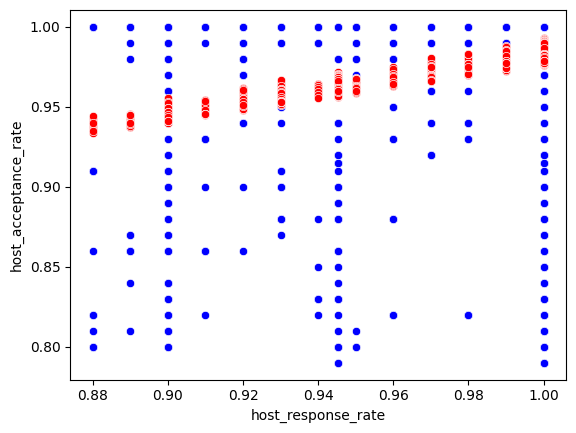

In [198]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=mexico_rentire)
sns.scatterplot(x='host_response_rate', y='Predicciones', color="red", data=mexico_rentire)

In [199]:
mexico["host_response_rate"].describe()

count    24224.000000
mean         1.033488
std          7.221895
min          0.870000
25%          0.990000
50%          1.000000
75%          1.000000
max       1125.000000
Name: host_response_rate, dtype: float64

### Private room 

In [200]:
# Crear subconjuntos por el tipo de habitación  
mexico_rpriv =mexico[mexico["room_type"] == "Private room"]
# Comprobamos el filtrado exitoso 
mexico_rpriv["room_type"].value_counts()

Private room    8202
Name: room_type, dtype: int64

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

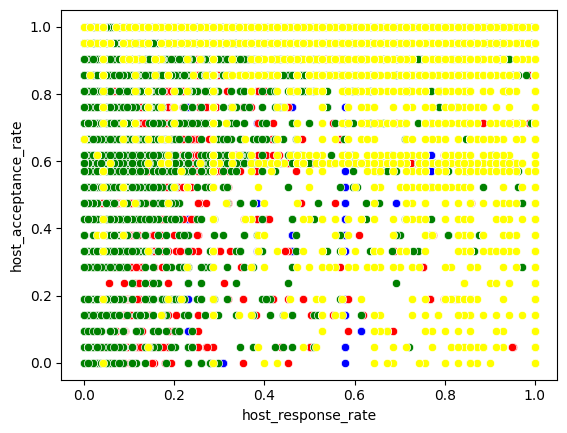

In [201]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = mexico_rpriv.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
mexico_scaled = pd.DataFrame(scaler.fit_transform(mexico_rpriv[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=mexico_scaled)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=mexico_scaled)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=mexico_scaled)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="yellow", data=mexico_scaled)

In [202]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = mexico_rpriv[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep = mexico_rpriv['host_acceptance_rate']

In [203]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 1.60820205e-01,  4.45404568e-06,  6.61348235e-05, -2.13499839e-02]),
 'rank_': 4,
 'singular_': array([4.32706432e+04, 1.90945220e+03, 1.42062923e+01, 2.61136393e+00]),
 'intercept_': 0.9132854130214372}

**Modelo matemático: y= 1.608x1 + 4.4540x2 + 6.613x3 - 2.134x4 + 0.9132**

In [204]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.01957118983811512

In [205]:
# Elaboramos predicciones 
y_pred= model.predict(X=mexico_rpriv[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
#Insertamos la columna de predicciones en el DataFrame
mexico_rpriv.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

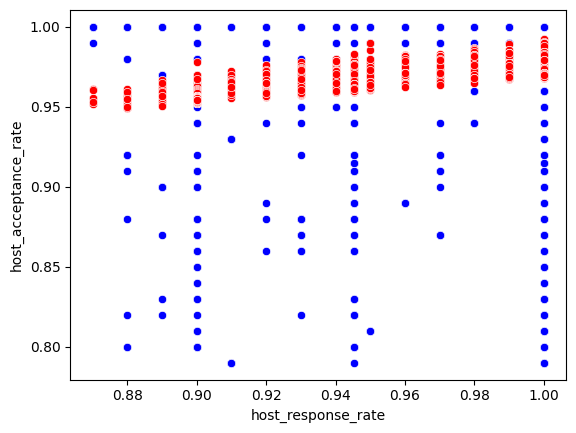

In [206]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=mexico_rpriv)
sns.scatterplot(x='host_response_rate', y='Predicciones', color="red", data=mexico_rpriv)

## Modelo 2: 
## **"Price”** vs availability_365, host_response_rate, number_of_reviews, accommodates

### Entire home/apt

In [207]:
# Crear subconjuntos por el tipo de habitación  
mexico_rentire =mexico[mexico["room_type"] == "Entire home/apt"]
# Comprobamos el filtrado exitoso 
mexico_rentire["room_type"].value_counts()

Entire home/apt    15601
Name: room_type, dtype: int64

<Axes: xlabel='availability_365', ylabel='price'>

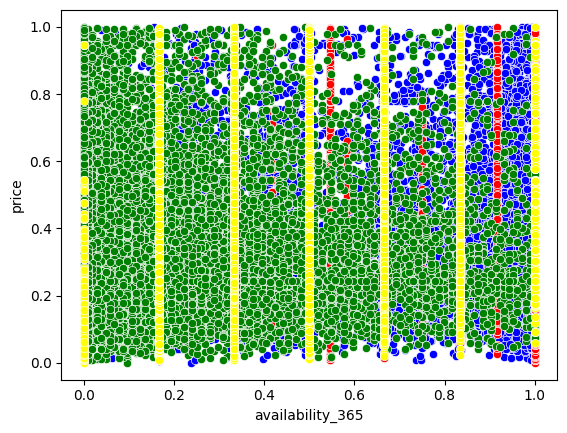

In [208]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = mexico_rentire.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
mexico_scaled = pd.DataFrame(scaler.fit_transform(mexico_rentire[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='availability_365', y='price', color="blue", data=mexico_scaled)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=mexico_scaled)
sns.scatterplot(x='number_of_reviews', y='price', color="green", data=mexico_scaled)
sns.scatterplot(x='accommodates', y='price', color="yellow", data=mexico_scaled)

In [209]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = mexico_rentire[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep = mexico_rentire['price']

In [210]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 1.60233034e-01,  6.59870301e+02, -1.39058914e+00,  9.24125633e+01]),
 'rank_': 4,
 'singular_': array([1.53871987e+04, 3.09001311e+03, 1.77249258e+02, 2.93336176e+00]),
 'intercept_': 284.46151779125114}

**Modelo matemático: y= 1.602x1 + 6.5987x2 + 6.5987x3 - 1.390x4 + 284.46151**

In [211]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.04862971795225213

In [212]:
# Elaboramos predicciones 
y_pred= model.predict(X=mexico_rentire[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
#Insertamos la columna de predicciones en el DataFrame
mexico_rentire.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='price'>

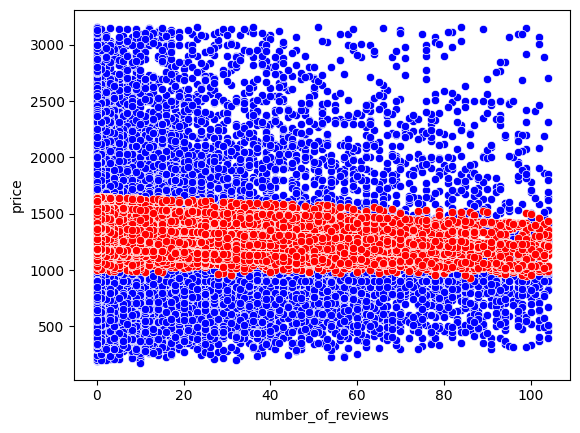

In [213]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=mexico_rentire)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=mexico_rentire)

### Private room 

In [214]:
# Crear subconjuntos por el tipo de habitación  
mexico_rpriv =mexico[mexico["room_type"] == "Private room"]
# Comprobamos el filtrado exitoso 
mexico_rpriv["room_type"].value_counts()

Private room    8202
Name: room_type, dtype: int64

<Axes: xlabel='availability_365', ylabel='price'>

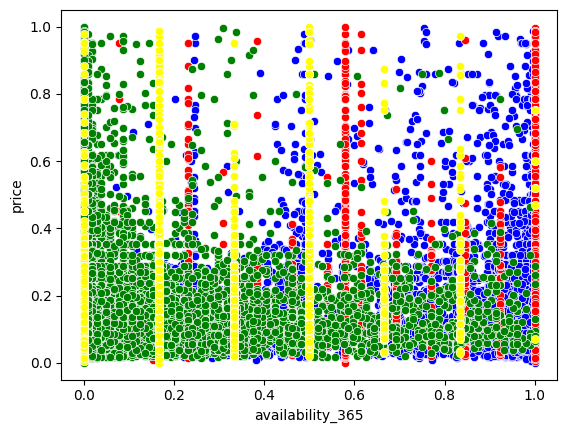

In [215]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = mexico_rpriv.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
mexico_scaled = pd.DataFrame(scaler.fit_transform(mexico_rpriv[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='availability_365', y='price', color="blue", data=mexico_scaled)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=mexico_scaled)
sns.scatterplot(x='number_of_reviews', y='price', color="green", data=mexico_scaled)
sns.scatterplot(x='accommodates', y='price', color="yellow", data=mexico_scaled)

In [216]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = mexico_rpriv[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep = mexico_rpriv['price']

In [217]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 4.10568197e-01, -1.40192901e+03, -1.87984197e+00,  1.57694949e+02]),
 'rank_': 4,
 'singular_': array([1.13341048e+04, 1.91273795e+03, 7.93288866e+01, 2.61916328e+00]),
 'intercept_': 1663.4205513797428}

**Modelo matemático: y= 4.1056x1 - 1.4019x2 - 1.8798x3 + 1.5769x4 + 0.1663.42**

In [218]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.11374201797000982

In [219]:
# Elaboramos predicciones 
y_pred= model.predict(X=mexico_rpriv[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
#Insertamos la columna de predicciones en el DataFrame
mexico_rpriv.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='price'>

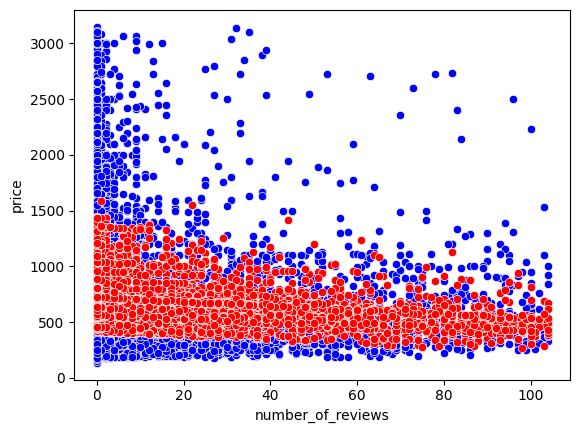

In [220]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=mexico_rpriv)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=mexico_rpriv)

## Modelo 3: 
## **“host_acceptance_rate** vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”



### Entire home/apt

In [221]:
# Crear subconjuntos por el tipo de habitación  
mexico_rentire =mexico[mexico["room_type"] == "Entire home/apt"]
# Comprobamos el filtrado exitoso 
mexico_rentire["room_type"].value_counts()

Entire home/apt    15601
Name: room_type, dtype: int64

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

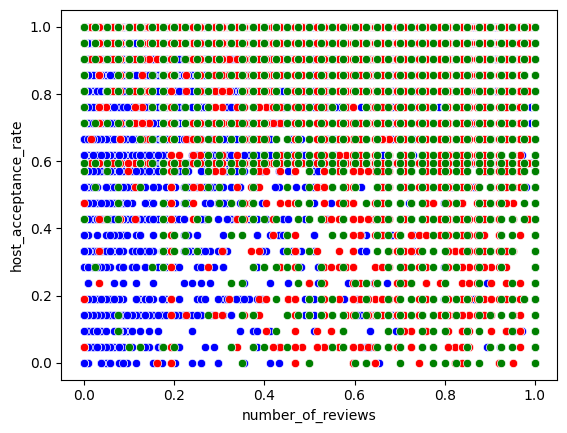

In [222]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = mexico_rentire.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
mexico_scaled = pd.DataFrame(scaler.fit_transform(mexico_rentire[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='number_of_reviews', y="host_acceptance_rate", color="blue", data=mexico_scaled)
sns.scatterplot(x='review_scores_cleanliness', y="host_acceptance_rate", color="red", data=mexico_scaled)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=mexico_scaled)

In [223]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = mexico_rentire[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep = mexico_rentire['host_acceptance_rate']

In [224]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 8.96254531e-05, -2.24445361e-03, -1.22703043e-02]),
 'rank_': 3,
 'singular_': array([3095.35912158,   18.32380123,   10.4074433 ]),
 'intercept_': 1.0472050650317137}

**Modelo matemático: y= 8.9625x1 -2.244x2 -1.2270x3 + 1.0472**

In [225]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.004934015637825362

In [226]:
# Elaboramos predicciones 
y_pred= model.predict(X=mexico_rentire[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
#Insertamos la columna de predicciones en el DataFrame
mexico_rentire.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

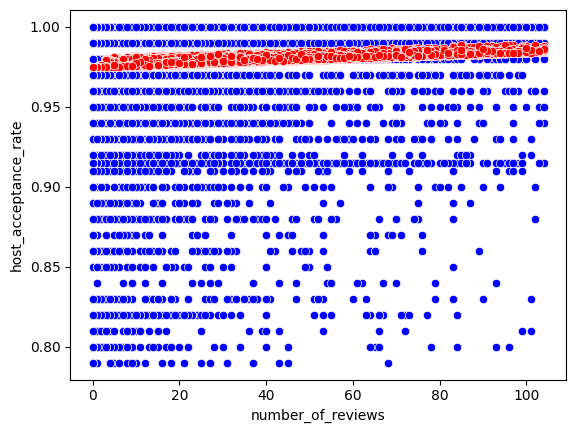

In [227]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=mexico_rentire)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=mexico_rentire)

### Private room 

In [228]:
# Crear subconjuntos por el tipo de habitación  
mexico_rpriv =mexico[mexico["room_type"] == "Private room"]
# Comprobamos el filtrado exitoso 
mexico_rpriv["room_type"].value_counts()

Private room    8202
Name: room_type, dtype: int64

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

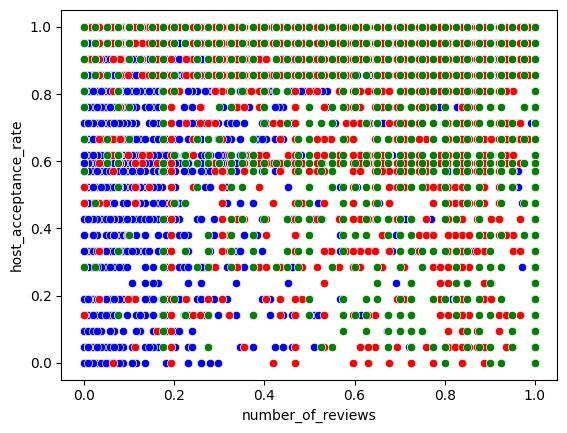

In [229]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = mexico_rpriv.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
mexico_scaled = pd.DataFrame(scaler.fit_transform(mexico_rpriv[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='number_of_reviews', y="host_acceptance_rate", color="blue", data=mexico_scaled)
sns.scatterplot(x='review_scores_cleanliness', y="host_acceptance_rate", color="red", data=mexico_scaled)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=mexico_scaled)

In [230]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = mexico_rpriv[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep = mexico_rpriv['host_acceptance_rate']

In [231]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 7.82728624e-05, -1.28990773e-02, -1.53713632e-02]),
 'rank_': 3,
 'singular_': array([1917.35159688,   13.53551861,    7.23441067]),
 'intercept_': 1.1090529163341152}

**Modelo matemático: y= 7.822x1 - 1.2899x2 - 1.537x3 + 1.109**

In [232]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.006604457488614379

In [233]:
# Elaboramos predicciones 
y_pred= model.predict(X=mexico_rpriv[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
#Insertamos la columna de predicciones en el DataFrame
mexico_rpriv.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

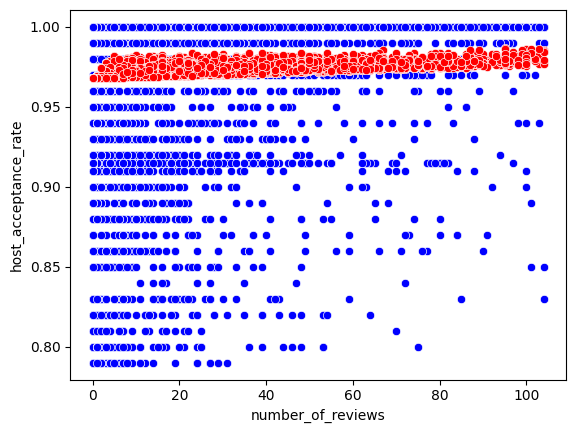

In [234]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=mexico_rpriv)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=mexico_rpriv)

# California

## Modelo 1: 
## **host_acceptance_rate**: host_response_rate, Price, number_of_reviews , review_scores_rating

### Entire home/apt

In [235]:
# Crear subconjuntos por el tipo de habitación  
cal_rentire =california[california["room_type"] == "Entire home/apt"]
# Comprobamos el filtrado exitoso 
cal_rentire["room_type"].value_counts()

Entire home/apt    4458
Name: room_type, dtype: int64

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

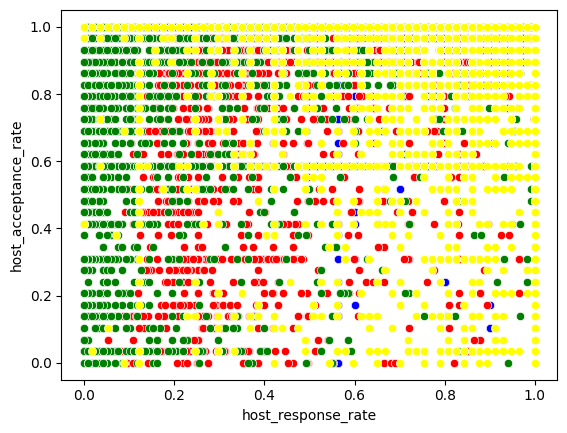

In [236]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = cal_rentire.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
cal_scaled = pd.DataFrame(scaler.fit_transform(cal_rentire[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=cal_scaled)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=cal_scaled)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=cal_scaled)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="yellow", data=cal_scaled)

In [237]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = cal_rentire[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep = cal_rentire['host_acceptance_rate']

In [238]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 2.85962638e-01,  5.99229315e-05,  5.76405037e-05, -1.67711035e-02]),
 'rank_': 4,
 'singular_': array([6.12754962e+03, 1.67875085e+03, 8.00371958e+00, 1.50861125e+00]),
 'intercept_': 0.7313109085300884}

**Modelo matemático: y= 2.859x1 + 5.9922x2 + 5.7640x3 - 1.6771x4 + 0.7313**

In [239]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.01335648434580039

In [240]:
# Elaboramos predicciones 
y_pred= model.predict(X=cal_rentire[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
#Insertamos la columna de predicciones en el DataFrame
cal_rentire.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

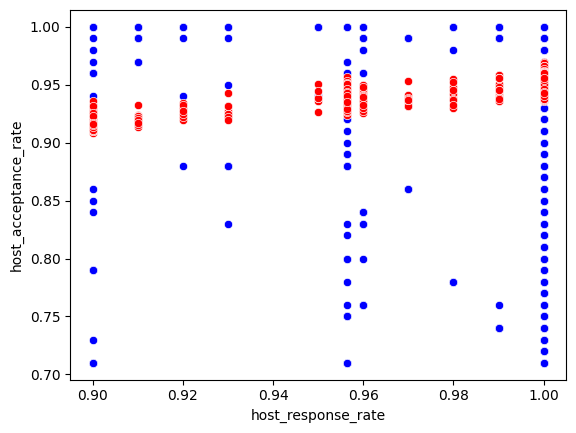

In [241]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=cal_rentire)
sns.scatterplot(x='host_response_rate', y='Predicciones', color="red", data=cal_rentire)

### Private room 

In [242]:
# Crear subconjuntos por el tipo de habitación  
cal_rpriv =california[california["room_type"] == "Private room"]
# Comprobamos el filtrado exitoso 
cal_rpriv["room_type"].value_counts()

Private room    2359
Name: room_type, dtype: int64

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

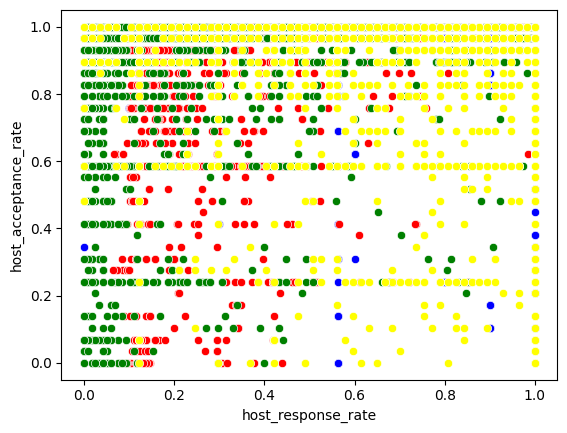

In [243]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = cal_rpriv.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
cal_scaled = pd.DataFrame(scaler.fit_transform(cal_rpriv[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=cal_scaled)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=cal_scaled)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=cal_scaled)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="yellow", data=cal_scaled)

In [244]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = cal_rpriv[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep = cal_rpriv['host_acceptance_rate']

In [245]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 6.12997925e-01, -4.38641563e-07,  1.18236179e-04, -1.53940341e-02]),
 'rank_': 4,
 'singular_': array([3.55470184e+03, 1.31841426e+03, 7.16613868e+00, 1.09190413e+00]),
 'intercept_': 0.4173857817681045}

**Modelo matemático: y= 6.1299x1 - 4.3864x2 + 1.182x3 - 1.5394x4 + 0.4173**

In [246]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.045353749421212175

In [247]:
# Elaboramos predicciones 
y_pred= model.predict(X=cal_rpriv[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
#Insertamos la columna de predicciones en el DataFrame
cal_rpriv.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

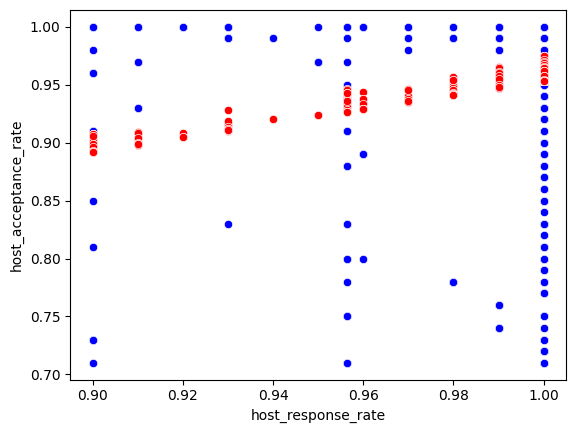

In [248]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=cal_rpriv)
sns.scatterplot(x='host_response_rate', y='Predicciones', color="red", data=cal_rpriv)

## Modelo 2: 
## **"Price”** vs availability_365, host_response_rate, number_of_reviews, accommodates

### Entire home/apt

In [249]:
# Crear subconjuntos por el tipo de habitación  
cal_rentire =california[california["room_type"] == "Entire home/apt"]
# Comprobamos el filtrado exitoso 
cal_rentire["room_type"].value_counts()

Entire home/apt    4458
Name: room_type, dtype: int64

<Axes: xlabel='availability_365', ylabel='price'>

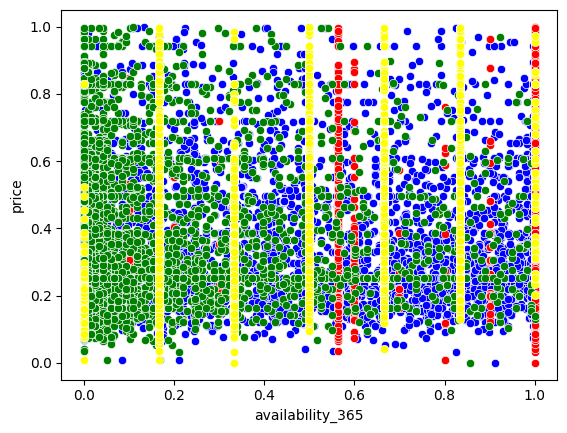

In [250]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = cal_rentire.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
cal_scaled = pd.DataFrame(scaler.fit_transform(cal_rentire[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='availability_365', y='price', color="blue", data=cal_scaled)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=cal_scaled)
sns.scatterplot(x='number_of_reviews', y='price', color="green", data=cal_scaled)
sns.scatterplot(x='accommodates', y='price', color="yellow", data=cal_scaled)

In [251]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = cal_rentire[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep = cal_rentire['price']

In [252]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([-3.95866113e-02, -1.35209909e+02,  1.04492745e-01,  2.06238722e+01]),
 'rank_': 4,
 'singular_': array([8.33885846e+03, 1.67379709e+03, 9.80677688e+01, 1.50910476e+00]),
 'intercept_': 258.9353058100038}

**Modelo matemático: y= -3.958x1 - 1.3520x2 +1.0449x3 + 2.0623x4 + 258.935**

In [253]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.11831298821922043

In [254]:
# Elaboramos predicciones 
y_pred= model.predict(X=cal_rentire[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
#Insertamos la columna de predicciones en el DataFrame
cal_rentire.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='price'>

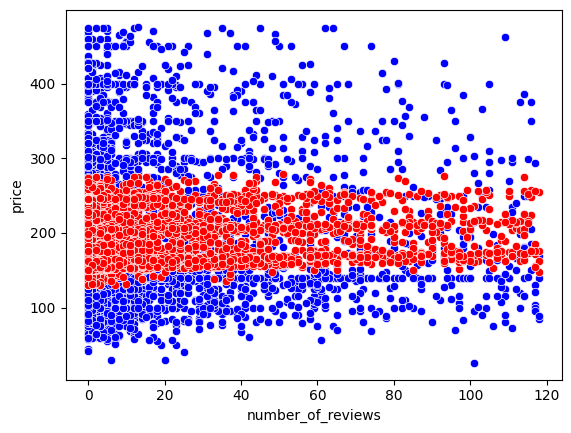

In [255]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=cal_rentire)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=cal_rentire)

### Private room 

In [256]:
# Crear subconjuntos por el tipo de habitación  
cal_rpriv =california[california["room_type"] == "Private room"]
# Comprobamos el filtrado exitoso 
cal_rpriv["room_type"].value_counts()

Private room    2359
Name: room_type, dtype: int64

<Axes: xlabel='availability_365', ylabel='price'>

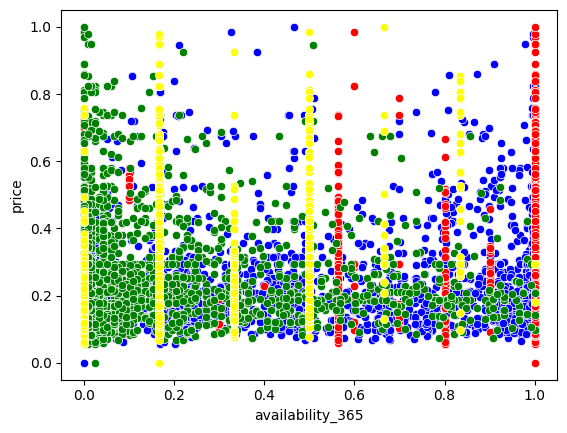

In [257]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = cal_rpriv.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
cal_scaled = pd.DataFrame(scaler.fit_transform(cal_rpriv[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='availability_365', y='price', color="blue", data=cal_scaled)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=cal_scaled)
sns.scatterplot(x='number_of_reviews', y='price', color="green", data=cal_scaled)
sns.scatterplot(x='accommodates', y='price', color="yellow", data=cal_scaled)

In [258]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = cal_rpriv[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep = cal_rpriv['price']

In [259]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 2.28650955e-02, -3.23766402e+02, -7.29884797e-02,  2.92770283e+01]),
 'rank_': 4,
 'singular_': array([6.57054794e+03, 1.31240160e+03, 5.21024308e+01, 1.08387245e+00]),
 'intercept_': 372.4941064412971}

**Modelo matemático: y= 2.2865x1 - 3.2376x2 - 7.2988x3 + 2.9277x4 + 372.4941**

In [260]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.1984293490024417

In [261]:
# Elaboramos predicciones 
y_pred= model.predict(X=cal_rpriv[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
#Insertamos la columna de predicciones en el DataFrame
cal_rpriv.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='price'>

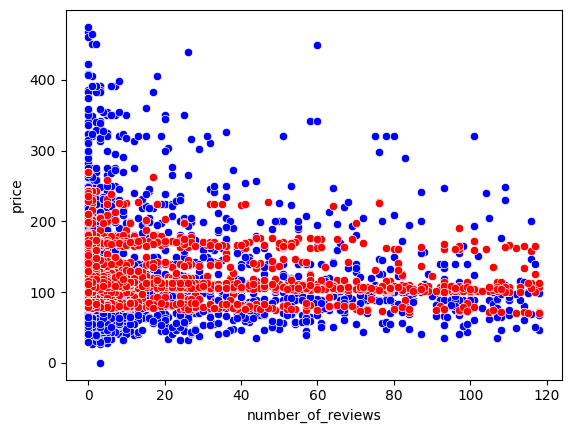

In [262]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=cal_rpriv)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=cal_rpriv)

## Modelo 3: 
## **“host_acceptance_rate** vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”



### Entire home/apt

In [263]:
# Crear subconjuntos por el tipo de habitación  
cal_rentire =california[california["room_type"] == "Entire home/apt"]
# Comprobamos el filtrado exitoso 
cal_rentire["room_type"].value_counts()

Entire home/apt    4458
Name: room_type, dtype: int64

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

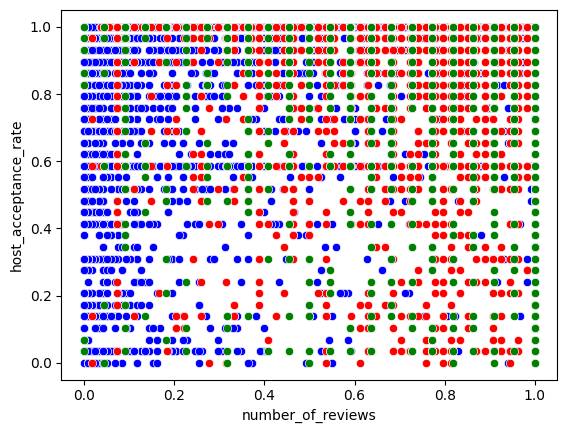

In [264]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = cal_rentire.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
cal_scaled = pd.DataFrame(scaler.fit_transform(cal_rentire[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='number_of_reviews', y="host_acceptance_rate", color="blue", data=cal_scaled)
sns.scatterplot(x='review_scores_cleanliness', y="host_acceptance_rate", color="red", data=cal_scaled)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=cal_scaled)

In [265]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = cal_rentire[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep = cal_rentire['host_acceptance_rate']

In [266]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 7.44597841e-05, -3.24663248e-03, -5.66782405e-02]),
 'rank_': 3,
 'singular_': array([1680.98784273,    8.25817597,    2.84554378]),
 'intercept_': 1.2408431831701292}

**Modelo matemático: y= 7.445x1 -3.2466x2 - 5.667x3 + 1.2408**

In [267]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.002515175395122915

In [268]:
# Elaboramos predicciones 
y_pred= model.predict(X=cal_rentire[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
#Insertamos la columna de predicciones en el DataFrame
cal_rentire.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

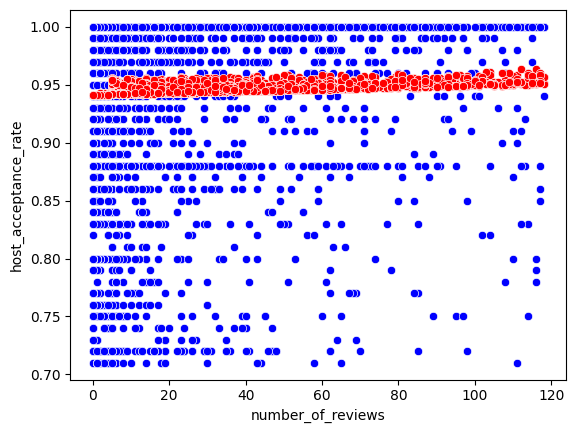

In [269]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=cal_rentire)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=cal_rentire)

### Private room 

In [270]:
# Crear subconjuntos por el tipo de habitación  
cal_rpriv =california[california["room_type"] == "Private room"]
# Comprobamos el filtrado exitoso 
cal_rpriv["room_type"].value_counts()

Private room    2359
Name: room_type, dtype: int64

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

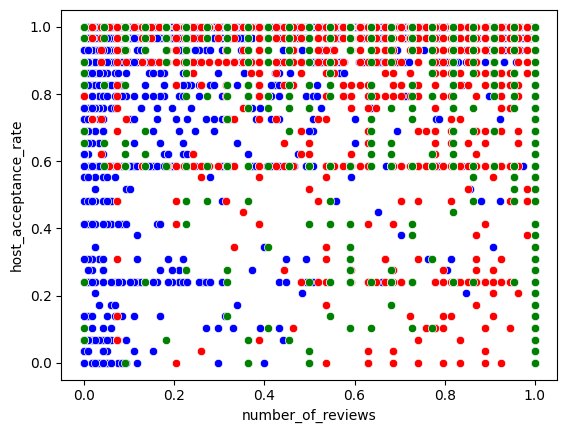

In [271]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = cal_rpriv.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
cal_scaled = pd.DataFrame(scaler.fit_transform(cal_rpriv[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='number_of_reviews', y="host_acceptance_rate", color="blue", data=cal_scaled)
sns.scatterplot(x='review_scores_cleanliness', y="host_acceptance_rate", color="red", data=cal_scaled)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=cal_scaled)

In [272]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = cal_rpriv[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep = cal_rpriv['host_acceptance_rate']

In [273]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.00014331, -0.0283829 , -0.02739714]),
 'rank_': 3,
 'singular_': array([1319.65060779,    6.96811188,    2.48693178]),
 'intercept_': 1.2222281538282371}

**Modelo matemático: y= 0.00014x1 - 0.0283x2 - 0.027x3 + 1.222**

In [274]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.010031175026352868

In [275]:
# Elaboramos predicciones 
y_pred= model.predict(X=cal_rpriv[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
#Insertamos la columna de predicciones en el DataFrame
cal_rpriv.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

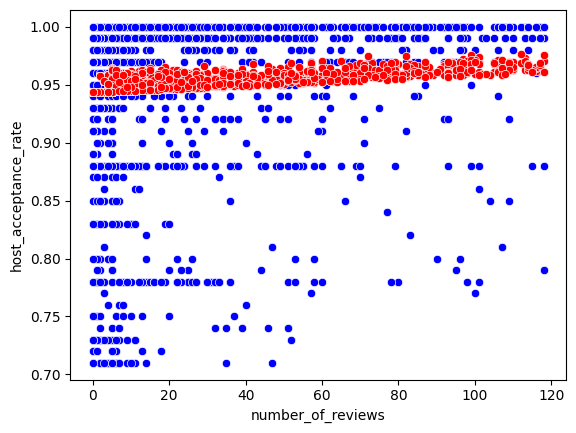

In [276]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=cal_rpriv)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=cal_rpriv)

# Girona

## Modelo 1: 
## **host_acceptance_rate**: host_response_rate, Price, number_of_reviews , review_scores_rating

### Entire home/apt

In [277]:
# Crear subconjuntos por el tipo de habitación  
gir_rentire =girona[girona["room_type"] == "Entire home/apt"]
# Comprobamos el filtrado exitoso 
gir_rentire["room_type"].value_counts()

Entire home/apt    18346
Name: room_type, dtype: int64

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

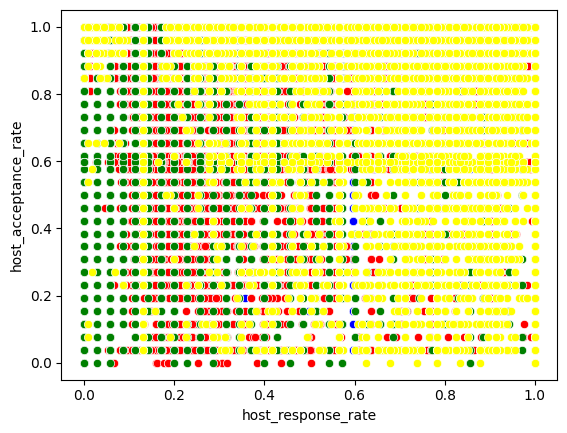

In [278]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = gir_rentire.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
gir_scaled = pd.DataFrame(scaler.fit_transform(gir_rentire[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=gir_scaled)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=gir_scaled)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=gir_scaled)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="yellow", data=gir_scaled)

In [279]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = gir_rentire[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep = gir_rentire['host_acceptance_rate']

In [280]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 7.65950822e-02, -9.25691499e-06, -2.74613498e-04, -1.74531863e-03]),
 'rank_': 4,
 'singular_': array([9.66700991e+03, 1.03783437e+03, 3.91667649e+01, 4.40726484e+00]),
 'intercept_': 0.8998857223042843}

**Modelo matemático: y= 7.659x1 - 9.2569x2 - 2.7461x3 - 1.7453x4 + 0.899**

In [281]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.002891459567682775

In [282]:
# Elaboramos predicciones 
y_pred= model.predict(X=gir_rentire[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
#Insertamos la columna de predicciones en el DataFrame
gir_rentire.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

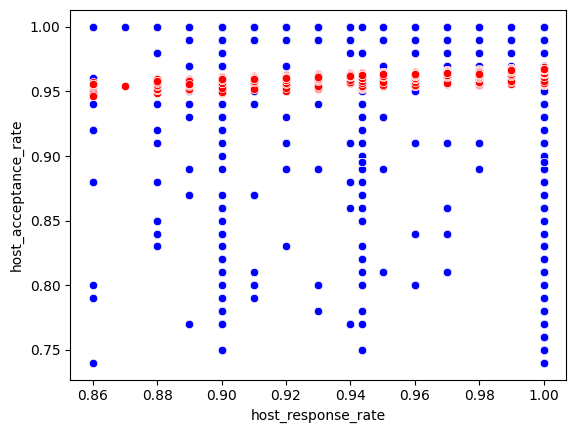

In [283]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=gir_rentire)
sns.scatterplot(x='host_response_rate', y='Predicciones', color="red", data=gir_rentire)

### Private room 

In [284]:
# Crear subconjuntos por el tipo de habitación  
gir_priv =girona[girona["room_type"] == "Private room"]
# Comprobamos el filtrado exitoso 
gir_priv["room_type"].value_counts()

Private room    1233
Name: room_type, dtype: int64

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

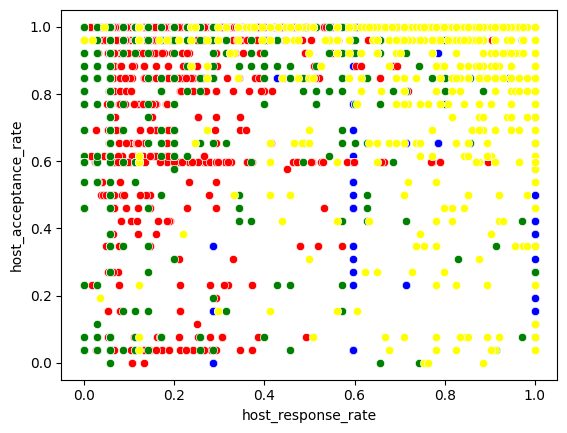

In [285]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = gir_priv.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
gir_scaled = pd.DataFrame(scaler.fit_transform(gir_priv[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=gir_scaled)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=gir_scaled)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=gir_scaled)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="yellow", data=gir_scaled)

In [286]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = gir_priv[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep = gir_priv['host_acceptance_rate']

In [287]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 2.25139859e-01,  9.23760409e-05, -1.41871307e-04,  9.06928933e-04]),
 'rank_': 4,
 'singular_': array([2.05713133e+03, 2.70058026e+02, 8.57972018e+00, 9.96930150e-01]),
 'intercept_': 0.7307590869065136}

**Modelo matemático: y= 2.251x1 + 9.237x2 - 1.4187x3 + 9.06928x4 + 0.7307**

In [288]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.01810557010693581

In [289]:
# Elaboramos predicciones 
y_pred= model.predict(X=gir_priv[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
#Insertamos la columna de predicciones en el DataFrame
gir_priv.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

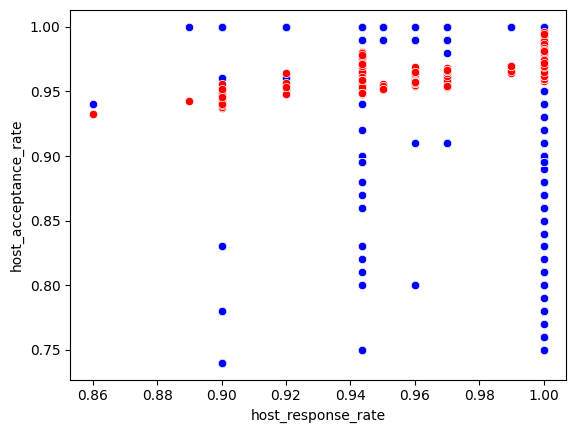

In [290]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=gir_priv)
sns.scatterplot(x='host_response_rate', y='Predicciones', color="red", data=gir_priv)

## Modelo 2: 
## **"Price”** vs availability_365, host_response_rate, number_of_reviews, accommodates

### Entire home/apt

In [291]:
# Crear subconjuntos por el tipo de habitación  
gir_rentire =girona[girona["room_type"] == "Entire home/apt"]
# Comprobamos el filtrado exitoso 
gir_rentire["room_type"].value_counts()

Entire home/apt    18346
Name: room_type, dtype: int64

<Axes: xlabel='availability_365', ylabel='price'>

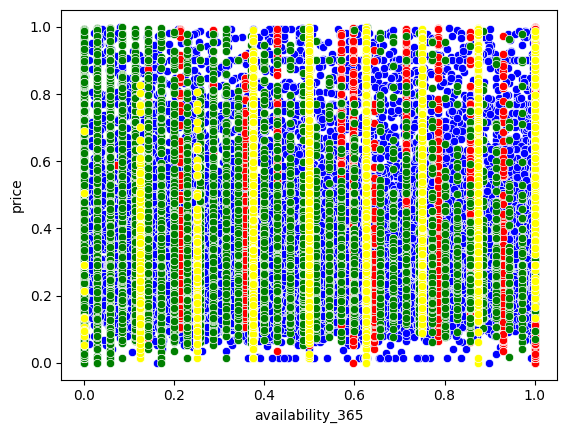

In [292]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = gir_rentire.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
gir_scaled = pd.DataFrame(scaler.fit_transform(gir_rentire[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='availability_365', y='price', color="blue", data=gir_scaled)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=gir_scaled)
sns.scatterplot(x='number_of_reviews', y='price', color="green", data=gir_scaled)
sns.scatterplot(x='accommodates', y='price', color="yellow", data=gir_scaled)

In [293]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = gir_rentire[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep = gir_rentire['price']

In [294]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 0.02639242, 22.05737555, -0.2178162 , 18.18371245]),
 'rank_': 4,
 'singular_': array([1.51354788e+04, 1.03758263e+03, 2.16867019e+02, 4.37562321e+00]),
 'intercept_': 21.41623186140842}

**Modelo matemático: y= 0.0263x1 + 22.0573x2 - 0.2178x3 + 18.1837x4 + 21.4126**

In [295]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.16795427322280676

In [296]:
# Elaboramos predicciones 
y_pred= model.predict(X=gir_rentire[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
#Insertamos la columna de predicciones en el DataFrame
gir_rentire.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='price'>

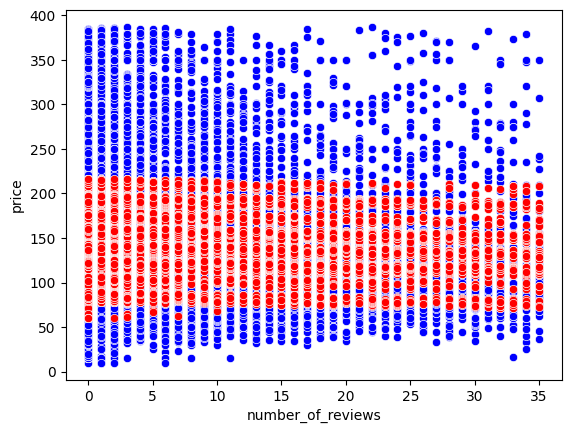

In [297]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=gir_rentire)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=gir_rentire)

### Private room 

In [298]:
# Crear subconjuntos por el tipo de habitación  
gir_priv =girona[girona["room_type"] == "Private room"]
# Comprobamos el filtrado exitoso 
gir_priv["room_type"].value_counts()

Private room    1233
Name: room_type, dtype: int64

<Axes: xlabel='availability_365', ylabel='price'>

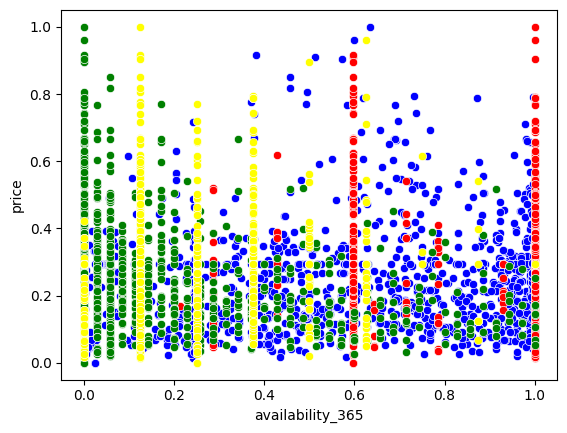

In [299]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = gir_priv.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
gir_scaled = pd.DataFrame(scaler.fit_transform(gir_priv[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='availability_365', y='price', color="blue", data=gir_scaled)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=gir_scaled)
sns.scatterplot(x='number_of_reviews', y='price', color="green", data=gir_scaled)
sns.scatterplot(x='accommodates', y='price', color="yellow", data=gir_scaled)

In [300]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = gir_priv[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep = gir_priv['price']

In [301]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 4.66403462e-02, -2.97877769e+02, -1.44303189e+00,  9.95965230e+00]),
 'rank_': 4,
 'singular_': array([4.20879293e+03, 2.76771700e+02, 4.10033892e+01, 9.89604678e-01]),
 'intercept_': 364.60901830055707}

**Modelo matemático: y= 4.66401 - 2.9787x2 - 1.4430x3 + 9.9596x4 + 364.6090**

In [302]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.10856820214404916

In [303]:
# Elaboramos predicciones 
y_pred= model.predict(X=gir_priv[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
#Insertamos la columna de predicciones en el DataFrame
gir_priv.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='price'>

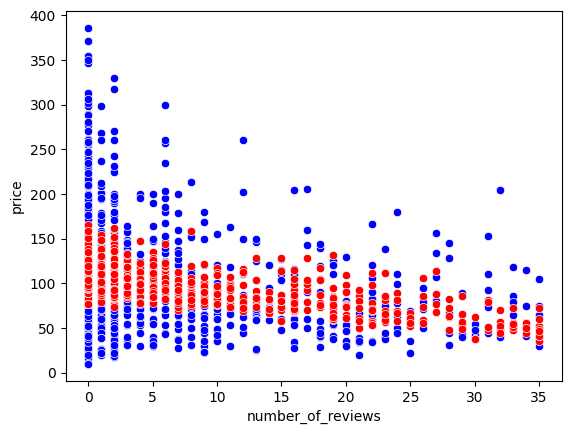

In [304]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=gir_priv)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=gir_priv)

## Modelo 3: 
## **“host_acceptance_rate** vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”



### Entire home/apt

In [305]:
# Crear subconjuntos por el tipo de habitación  
gir_rentire =girona[girona["room_type"] == "Entire home/apt"]
# Comprobamos el filtrado exitoso 
gir_rentire["room_type"].value_counts()

Entire home/apt    18346
Name: room_type, dtype: int64

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

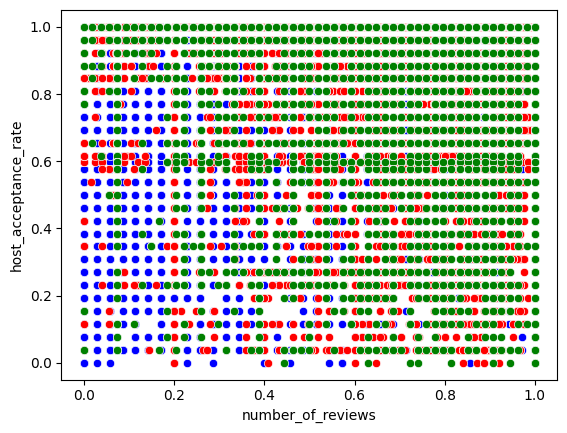

In [306]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = gir_rentire.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
gir_scaled = pd.DataFrame(scaler.fit_transform(gir_rentire[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='number_of_reviews', y="host_acceptance_rate", color="blue", data=gir_scaled)
sns.scatterplot(x='review_scores_cleanliness', y="host_acceptance_rate", color="red", data=gir_scaled)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=gir_scaled)

In [307]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = gir_rentire[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep = gir_rentire['host_acceptance_rate']

In [308]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.00020867,  0.0013691 ,  0.00057314]),
 'rank_': 3,
 'singular_': array([1038.34177199,   42.10069724,   16.2012588 ]),
 'intercept_': 0.9555764538803002}

**Modelo matemático: y= -0.00020x1 + 0.0013x2 - 0.00057x3 + 0.9555**

In [309]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0009294834494459892

In [310]:
# Elaboramos predicciones 
y_pred= model.predict(X=gir_rentire[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
#Insertamos la columna de predicciones en el DataFrame
gir_rentire.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

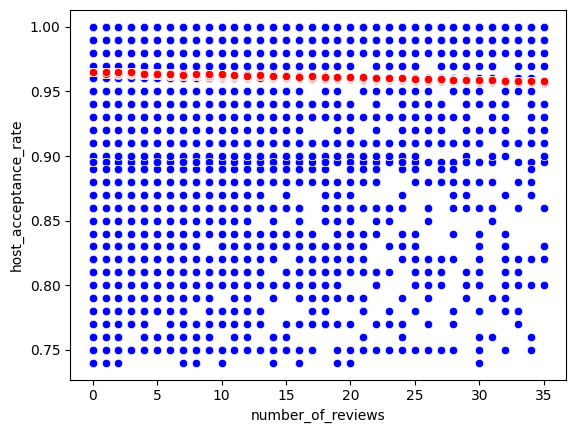

In [311]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=gir_rentire)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=gir_rentire)

### Private room 

In [312]:
# Crear subconjuntos por el tipo de habitación  
gir_priv =girona[girona["room_type"] == "Private room"]
# Comprobamos el filtrado exitoso 
gir_priv["room_type"].value_counts()

Private room    1233
Name: room_type, dtype: int64

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

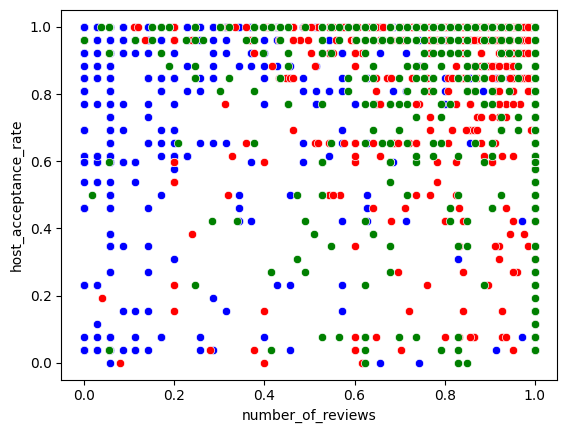

In [313]:
# Escalamos los datos 
from sklearn.preprocessing import MinMaxScaler
numeric_cols = gir_priv.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
gir_scaled = pd.DataFrame(scaler.fit_transform(gir_priv[numeric_cols]), columns=numeric_cols)

# Se explora de manera gráfica la relación entre las variables 
from turtle import color
sns.scatterplot(x='number_of_reviews', y="host_acceptance_rate", color="blue", data=gir_scaled)
sns.scatterplot(x='review_scores_cleanliness', y="host_acceptance_rate", color="red", data=gir_scaled)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=gir_scaled)

In [314]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = gir_priv[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep = gir_priv['host_acceptance_rate']

In [315]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-4.85655562e-05,  1.24028937e-02,  1.54496840e-02]),
 'rank_': 3,
 'singular_': array([276.78949528,   8.22307938,   3.477109  ]),
 'intercept_': 0.8278520008865411}

**Modelo matemático: y= -4.856x1 + 1.240x2 + 1.5449x3 + 0.827**

In [316]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.004551268651632578

In [317]:
# Elaboramos predicciones 
y_pred= model.predict(X=gir_priv[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
#Insertamos la columna de predicciones en el DataFrame
gir_priv.insert(0, 'Predicciones', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

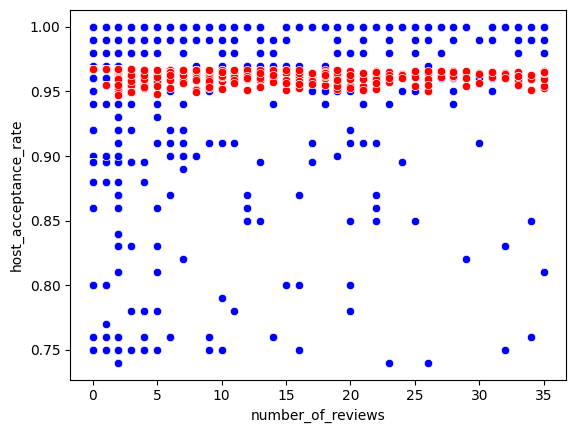

In [318]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido para una variable 
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=gir_priv)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=gir_priv)

# Creación del modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento elegido, utilizando la variable con mayor correlación.

## México

### Mejor modelo: Entire home/apt

In [319]:
# Crear subconjuntos por el tipo de habitación  
mexico_rentire =mexico[mexico["room_type"] == "Entire home/apt"]

In [320]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= mexico_rentire.corr()

<ipython-input-320-2a25564de125>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors= mexico_rentire.corr()


In [321]:
Corr_Factors1 = Corr_Factors["number_of_reviews"]
Corr_Factors1= abs(Corr_Factors1)
Corr_Factors1.sort_values(ascending=False)

number_of_reviews                               1.000000
number_of_reviews_ltm                           0.451946
id                                              0.374398
Unnamed: 0                                      0.338510
review_scores_checkin                           0.264661
review_scores_communication                     0.259467
reviews_per_month                               0.247716
number_of_reviews_l30d                          0.231897
review_scores_cleanliness                       0.223559
review_scores_location                          0.223516
review_scores_rating                            0.216792
review_scores_value                             0.203597
review_scores_accuracy                          0.201501
maximum_maximum_nights                          0.190995
maximum_nights_avg_ntm                          0.189850
minimum_maximum_nights                          0.183110
host_id                                         0.111526
maximum_nights                 

In [322]:
# Seleccionamos las variables con la mayor correlación 
#review_scores_checkin
#review_scores_communication
#review_scores_cleanliness
#review_scores_location 

In [323]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = mexico_rentire[['review_scores_checkin', 'review_scores_communication','review_scores_cleanliness',"review_scores_location"]]
Var_Dep = mexico_rentire['number_of_reviews']

In [324]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_checkin', 'review_scores_communication',
        'review_scores_cleanliness', 'review_scores_location'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([-35.55562259, -31.70496473, -16.53406987, -33.15235706]),
 'rank_': 4,
 'singular_': array([20.35733195, 12.2346302 , 10.17113944,  8.33529184]),
 'intercept_': 597.3727024003182}

**Modelo matemático: y= -35.55x1 - 31.704x2 - 16.524x3 - 33.1523x4 + 597.3727**

In [325]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.11607708955629581

### Mejor modelo: Private room

In [326]:
# Crear subconjuntos por el tipo de habitación  
mexico_rpriv =mexico[mexico["room_type"] == "Private room"]

In [327]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= mexico_rpriv.corr()

<ipython-input-327-27c8fa238b9d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors= mexico_rpriv.corr()


In [328]:
Corr_Factors1 = Corr_Factors["number_of_reviews"]
Corr_Factors1= abs(Corr_Factors1)
Corr_Factors1.sort_values(ascending=False)

number_of_reviews                               1.000000
number_of_reviews_ltm                           0.538937
review_scores_checkin                           0.338176
review_scores_communication                     0.335161
reviews_per_month                               0.327945
number_of_reviews_l30d                          0.323919
review_scores_rating                            0.293094
review_scores_cleanliness                       0.291841
review_scores_accuracy                          0.277382
Unnamed: 0                                      0.274053
review_scores_location                          0.272155
review_scores_value                             0.271322
id                                              0.270211
maximum_nights_avg_ntm                          0.160888
maximum_maximum_nights                          0.160361
minimum_maximum_nights                          0.159493
host_id                                         0.135516
availability_30                

In [329]:
# Seleccionamos las variables con la mayor correlación 
#review_scores_checkin
#review_scores_communication
#review_scores_cleanliness
#review_scores_rating 

In [330]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = mexico_rpriv[['review_scores_checkin', 'review_scores_communication','review_scores_cleanliness',"review_scores_rating"]]
Var_Dep = mexico_rpriv['number_of_reviews']

In [331]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_checkin', 'review_scores_communication',
        'review_scores_cleanliness', 'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([-42.13054312, -37.10177406, -16.01256148,  -6.82624614]),
 'rank_': 4,
 'singular_': array([19.40538572,  8.86775075,  7.62848254,  5.48632366]),
 'intercept_': 517.9827977509857}

**Modelo matemático: y= -42.1305x1 - 37.10177x2 - 16.012x3 - 6.826x4 + 517.9827**

In [332]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.162567273809461

## California

### Mejor modelo: Entire home/apt

In [333]:
# Crear subconjuntos por el tipo de habitación  
cal_rentire =california[california["room_type"] == "Entire home/apt"]

In [334]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= cal_rentire.corr()

<ipython-input-334-9b2660c8abc5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors= cal_rentire.corr()


In [335]:
Corr_Factors1 = Corr_Factors["number_of_reviews"]
Corr_Factors1= abs(Corr_Factors1)
Corr_Factors1.sort_values(ascending=False)

number_of_reviews                               1.000000
reviews_per_month                               0.332564
Unnamed: 0                                      0.324298
review_scores_communication                     0.307391
number_of_reviews_ltm                           0.302990
review_scores_checkin                           0.296698
review_scores_value                             0.264877
review_scores_accuracy                          0.261184
review_scores_location                          0.261140
review_scores_rating                            0.254917
ï»¿id                                           0.224668
minimum_nights                                  0.216500
review_scores_cleanliness                       0.210637
minimum_minimum_nights                          0.205845
maximum_minimum_nights                          0.182713
minimum_nights_avg_ntm                          0.179054
latitude                                        0.149671
host_listings_count            

In [336]:
# Seleccionamos las variables con la mayor correlación 
#review_scores_checkin
#review_scores_communication
#review_scores_value                             
#review_scores_accuracy    

In [337]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = cal_rentire[['review_scores_communication', 'review_scores_checkin','review_scores_value',"review_scores_accuracy"]]
Var_Dep = cal_rentire['number_of_reviews']

In [338]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication', 'review_scores_checkin',
        'review_scores_value', 'review_scores_accuracy'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([-89.67237622, -78.16104892, -15.73610155, -22.88087229]),
 'rank_': 4,
 'singular_': array([13.09533527,  5.31706485,  3.06703288,  2.27665103]),
 'intercept_': 1040.3242838213494}

**Modelo matemático: y= -89.6723x1 - 78.161x2 - 15.736x3 - 22.8808x4 + 1040.324**

In [339]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.14631349748420996

### Mejor modelo: Private room

In [340]:
# Crear subconjuntos por el tipo de habitación  
cal_rpriv =california[california["room_type"] == "Private room"]

In [341]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= cal_rpriv.corr()

<ipython-input-341-13ed5544a1d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors= cal_rpriv.corr()


In [342]:
Corr_Factors1 = Corr_Factors["number_of_reviews"]
Corr_Factors1= abs(Corr_Factors1)
Corr_Factors1.sort_values(ascending=False)

number_of_reviews                               1.000000
reviews_per_month                               0.310485
review_scores_accuracy                          0.286475
review_scores_value                             0.278163
review_scores_location                          0.274767
review_scores_rating                            0.267137
review_scores_checkin                           0.266000
review_scores_cleanliness                       0.264556
review_scores_communication                     0.255518
Unnamed: 0                                      0.223294
number_of_reviews_ltm                           0.219295
minimum_minimum_nights                          0.183273
minimum_nights                                  0.181213
maximum_minimum_nights                          0.179968
minimum_nights_avg_ntm                          0.176354
number_of_reviews_l30d                          0.159585
calculated_host_listings_count_private_rooms    0.114928
host_response_rate             

In [343]:
# Seleccionamos las variables con la mayor correlación 
#review_scores_accuracy
#review_scores_value
#review_scores_location                          
#review_scores_rating 

In [344]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = cal_rpriv[['review_scores_accuracy', 'review_scores_value','review_scores_location',"review_scores_rating"]]
Var_Dep = cal_rpriv['number_of_reviews']

In [345]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_accuracy', 'review_scores_value',
        'review_scores_location', 'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([-36.84794161, -14.70473097, -32.91594199, -11.89241917]),
 'rank_': 4,
 'singular_': array([11.96384883,  6.01856915,  5.49705647,  3.81286565]),
 'intercept_': 489.1207653148929}

**Modelo matemático: y= -36.847x1 - 14.7004x2 - 32.9159x3 - 11.8924x4 + 489.1207**

In [346]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.1344824102129557

## Girona

### Mejor modelo: Entire home/apt

In [347]:
# Crear subconjuntos por el tipo de habitación  
gir_rentire =girona[girona["room_type"] == "Entire home/apt"]

In [348]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= gir_rentire.corr()

<ipython-input-348-e0f8571a4bc6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors= gir_rentire.corr()


In [349]:
Corr_Factors1 = Corr_Factors["number_of_reviews"]
Corr_Factors1= abs(Corr_Factors1)
Corr_Factors1.sort_values(ascending=False)

number_of_reviews                               1.000000
number_of_reviews_ltm                           0.465315
reviews_per_month                               0.374231
review_scores_location                          0.320382
review_scores_accuracy                          0.313588
review_scores_checkin                           0.302503
id                                              0.287820
review_scores_communication                     0.270586
review_scores_value                             0.248009
review_scores_cleanliness                       0.224453
review_scores_rating                            0.200222
calculated_host_listings_count_entire_homes     0.169526
calculated_host_listings_count                  0.159729
host_listings_count                             0.148878
host_total_listings_count                       0.148575
minimum_maximum_nights                          0.129640
host_id                                         0.108827
host_response_rate             

In [350]:
# Seleccionamos las variables con la mayor correlación 
#review_scores_location 
#review_scores_communication
#eview_scores_checkin                               
#review_scores_accuracy    

In [351]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = gir_rentire[['review_scores_location', 'review_scores_communication','review_scores_checkin',"review_scores_accuracy"]]
Var_Dep = gir_rentire['number_of_reviews']

In [352]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location', 'review_scores_communication',
        'review_scores_checkin', 'review_scores_accuracy'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([-9.77706903, -4.57100306, -6.45863767, -5.54288978]),
 'rank_': 4,
 'singular_': array([32.87039268, 17.84952124, 16.3408686 , 12.77398851]),
 'intercept_': 134.73926736625535}

**Modelo matemático: y= -9.777x1 - 4.5710x2 - 6.4586x3 - 5.5428 + 134.7392**

In [353]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.16547913101977985

### Mejor modelo: Private room

In [354]:
# Crear subconjuntos por el tipo de habitación  
gir_rpriv =girona[girona["room_type"] == "Private room"]

In [355]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= gir_rpriv.corr()

<ipython-input-355-7149ea7ac01c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors= gir_rpriv.corr()


In [356]:
Corr_Factors1 = Corr_Factors["number_of_reviews"]
Corr_Factors1= abs(Corr_Factors1)
Corr_Factors1.sort_values(ascending=False)

number_of_reviews                               1.000000
review_scores_location                          0.412529
number_of_reviews_ltm                           0.401578
reviews_per_month                               0.335164
review_scores_accuracy                          0.333045
review_scores_checkin                           0.317066
review_scores_communication                     0.305148
review_scores_value                             0.304380
review_scores_cleanliness                       0.242789
id                                              0.232974
review_scores_rating                            0.223247
price                                           0.217225
host_id                                         0.139127
host_listings_count                             0.137207
maximum_minimum_nights                          0.129670
host_total_listings_count                       0.121153
host_response_rate                              0.112006
calculated_host_listings_count 

In [357]:
# Seleccionamos las variables con la mayor correlación 
#review_scores_location
#review_scores_accuracy
#review_scores_checkin                          
#review_scores_communication  

In [358]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = gir_rpriv[['review_scores_location', 'review_scores_accuracy','review_scores_checkin',"review_scores_communication"]]
Var_Dep = gir_rpriv['number_of_reviews']

In [359]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location', 'review_scores_accuracy',
        'review_scores_checkin', 'review_scores_communication'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([-15.10382031,  -5.04337975,  -4.49611614,  -6.70362465]),
 'rank_': 4,
 'singular_': array([7.93604948, 4.33172506, 3.10776153, 2.80550432]),
 'intercept_': 158.98710892314082}

**Modelo matemático: y= -15.103x1 - 5.0433x2 - 4.496x3 - 16.7036x4 + 158.9871**

In [360]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.2101246576990945